In [2]:
#Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
import pandas as pd
import numpy as np

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import seaborn as sns

# ÏÇ¨Ïù¥ÌÇ∑Îü∞: Ï†ÑÏ≤òÎ¶¨
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# ÏÇ¨Ïù¥ÌÇ∑Îü∞: Î™®Îç∏ ÏÑ†ÌÉù Î∞è ÌèâÍ∞Ä
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# ÏÇ¨Ïù¥ÌÇ∑Îü∞: ÎåÄÌëú Î™®Îç∏
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥ Î™®Îç∏
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Í∏∞ÌÉÄ (ÌïÑÏöî Ïãú)
import warnings
warnings.filterwarnings('ignore')

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
import matplotlib.pyplot as plt
import seaborn as sns

Ï∞æÏùÄ ÎÇòÎàî Ìè∞Ìä∏:
  C:\Windows\Fonts\NanumSquareR.ttf
  C:\Windows\Fonts\NanumBarunpenR.ttf


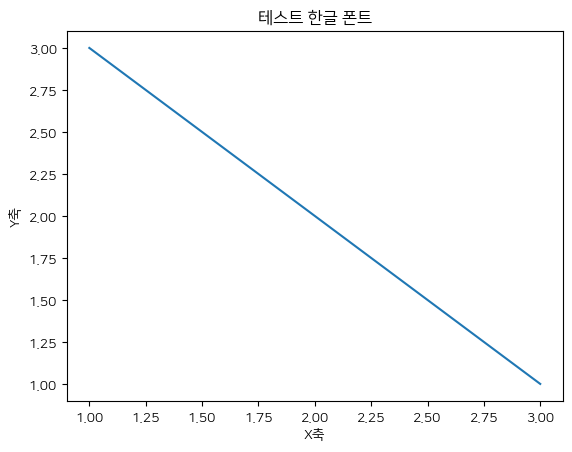

In [3]:
import matplotlib.font_manager as fm

paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
nanum_fonts = [p for p in paths if 'Nanum' in p]  # 'NanumGothic' ÎåÄÏã† 'Nanum' ÏúºÎ°ú Í≤ÄÏÉâ
print("Ï∞æÏùÄ ÎÇòÎàî Ìè∞Ìä∏:")
for p in nanum_fonts:
    print(" ", p)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # Ïù¥ Ï§Ñ Ï∂îÍ∞Ä!

# 1) Í≤ΩÎ°ú ÏßÄÏ†ï (Í≥µÎ∞± ÏÇ≠Ï†ú)
nanum_path = r"C:/Windows/Fonts/NanumSquareR.ttf"

# 2) Ìè∞Ìä∏ Îì±Î°ù
fm.fontManager.addfont(nanum_path)

# 3) Ïã§Ï†ú Ìè∞Ìä∏ Ïù¥Î¶Ñ Ï∂îÏ∂ú
prop = FontProperties(fname=nanum_path)
font_name = prop.get_name()

# 4) rcParamsÏóê Î∞òÏòÅ
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# 5) ÌÖåÏä§Ìä∏ ÌîåÎ°Ø
plt.plot([1,2,3], [3,2,1])
plt.title("ÌÖåÏä§Ìä∏ ÌïúÍ∏Ä Ìè∞Ìä∏")
plt.xlabel("XÏ∂ï")
plt.ylabel("YÏ∂ï")
plt.show()

In [4]:
fatigue_df = pd.read_csv(r'C:/Users/user/OneDrive/Desktop/ÏµúÍ∞ïÏù¥ÏÑ∏Ïö©/ÏµúÏ¢Ö.csv', encoding = 'cp949')

In [5]:
fatigue_df.isnull().sum()

ÏÑ†Ïàò              0
Ïó∞ÎèÑ              0
ÌåÄ               0
Î≥¥ÏßÅ              0
ÎÇòÏù¥              0
             ... 
Ìú¥ÏãùÎåÄÏó∞Ìà¨ÎπÑÏú®       163
Ïó∞Ìà¨ÌöüÏàò_roll3    489
Ïó∞Ìà¨ÏùºÏàò_roll3    489
Ìú¥Ïãù_inv        163
ÌîºÎ°úÎèÑÏßÄÏàò           0
Length: 76, dtype: int64

In [6]:
# 1. Íµ¨ÏÜç_Î≥ÄÌôîÎüâ Ïª¨Îüº Ï†úÍ±∞
fatigue_df.drop(columns=['Íµ¨ÏÜç_Î≥ÄÌôîÎüâ'], inplace=True)

# 2. Î∂ÄÏÉÅÏúÑÌóòÎèÑ Í≤∞Ï∏°Í∞í 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞
fatigue_df['Î∂ÄÏÉÅÏúÑÌóòÎèÑ'] = fatigue_df['Î∂ÄÏÉÅÏúÑÌóòÎèÑ'].fillna(0)

## Ïã†Ï≤¥ Í∏∞Îüâ PCA

## Ï£ºÏÑ±Î∂Ñ 1Í∞ú ÏÑ§Î™ÖÎ†• : 59.59%

## GPT ÌîºÏÖú Í∑∏ÎûòÎèÑ SHAPÌï¥Îùº

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# 1. ÏÇ¨Ïö©Ìï† Í∏∞Îüâ Î≥ÄÏàò
skill_features = ['ERA', 'WHIP', 'ÏßÅÍµ¨_ÌîºÏïàÌÉÄÏú®']

# 2. Í≤∞Ï∏°Ïπò Ï†úÍ±∞
X_skill = fatigue_df[skill_features].dropna()

# 3. ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X_skill_const = add_constant(X_skill)

# 4. VIF Í≥ÑÏÇ∞
vif_skill = pd.DataFrame()
vif_skill['Î≥ÄÏàò'] = X_skill_const.columns
vif_skill['VIF'] = [variance_inflation_factor(X_skill_const.values, i) for i in range(X_skill_const.shape[1])]

display(vif_skill)

Î≥ÄÏàò        VIF
0    const  19.260083
1      ERA   2.489450
2     WHIP   2.494524
3  ÏßÅÍµ¨_ÌîºÏïàÌÉÄÏú®   1.005557

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. ÏÑ†Ïàò Í∏∞Îüâ Î≥ÄÏàò
skill_vars = ['ERA', 'WHIP', 'ÏßÅÍµ¨_ÌîºÏïàÌÉÄÏú®']
X_skill = fatigue_df[skill_vars].dropna()

# 2. ÌëúÏ§ÄÌôî (PCA Ï†ÑÏóê Íº≠ ÌïÑÏöî)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_skill)

# 3. PCA Ï£ºÏÑ±Î∂Ñ 1Í∞ú Ï∂îÏ∂ú
pca = PCA(n_components=1)
PC1 = pca.fit_transform(X_scaled)

# 4. Í≤∞Í≥º Ï∂îÍ∞Ä
fatigue_df.loc[X_skill.index, 'Í∏∞Îüâ_PC1'] = PC1[:, 0]

In [9]:
print(f"Í∏∞Îüâ_PC1 ÏÑ§Î™ÖÎ†•: {pca.explained_variance_ratio_[0]:.2%}")

Í∏∞Îüâ_PC1 ÏÑ§Î™ÖÎ†•: 59.49%


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. ÏÇ¨Ïö©Ìï† Í∏∞Îüâ Î≥ÄÏàò
skill_vars = ['ERA', 'WHIP', 'ÏßÅÍµ¨_ÌîºÏïàÌÉÄÏú®']
X_skill = fatigue_df[skill_vars].dropna()

# 2. ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_skill)

# 3. PCA (2Í∞ú Ï£ºÏÑ±Î∂Ñ)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Í≤∞Í≥º Ï†ÄÏû•
fatigue_df.loc[X_skill.index, 'Í∏∞Îüâ_PC1'] = X_pca[:, 0]
fatigue_df.loc[X_skill.index, 'Í∏∞Îüâ_PC2'] = X_pca[:, 1]

# 5. ÏÑ§Î™ÖÎ†• Ï∂úÎ†•
print(f"PC1 ÏÑ§Î™ÖÎ†•: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2 ÏÑ§Î™ÖÎ†•: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Ï¥ù ÏÑ§Î™ÖÎ†•: {pca.explained_variance_ratio_.sum():.2%}")

PC1 ÏÑ§Î™ÖÎ†•: 59.49%
PC2 ÏÑ§Î™ÖÎ†•: 32.96%
Ï¥ù ÏÑ§Î™ÖÎ†•: 92.46%


# Z-score

In [11]:
#%pip install shap

In [12]:
# Venue_bin: Home = 1, Away = 0
fatigue_df['Íµ¨Ïû•'] = fatigue_df['Íµ¨Ïû•'].map({'Home': 1, 'Away': 0})

In [ ]:
env_vars = ['ÎàÑÏ†ÅÏù¥ÎèôÍ±∞Î¶¨', 'Ïò®ÎèÑ', 'Íµ¨Ïû•']

from sklearn.preprocessing import StandardScaler

# z-score Î≥ÄÌôò
scaler = StandardScaler()
env_z = scaler.fit_transform(fatigue_df[env_vars])

# ÌëúÏ§ÄÌôîÎêú Í≤∞Í≥º Ï†ÄÏû•
env_z_df = pd.DataFrame(env_z, columns=[f"{col}_z" for col in env_vars])
fatigue_df = pd.concat([fatigue_df.reset_index(drop=True), env_z_df], axis=1)

# ÌèâÍ∑† Í∏∞Î∞ò ÌôòÍ≤ΩÏßÄÏàò ÏÉùÏÑ±
fatigue_df['ÌôòÍ≤ΩÏßÄÏàò_z'] = env_z_df.mean(axis=1)

In [14]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import shap

# ÌÉÄÍπÉ Î∞è ÌîºÏ≤ò ÏÑ§Ï†ï
target = 'GS_Î≥ÄÌôîÎüâ'
env_z_cols = [f"{col}_z" for col in env_vars]

X_env = fatigue_df[env_z_cols]
y_env = fatigue_df[target]

X_train, X_test, y_train, y_test = train_test_split(X_env, y_env, test_size=0.2, random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model_env = CatBoostRegressor(verbose=0, random_state=42)
model_env.fit(X_train, y_train)

In [15]:
explainer = shap.Explainer(model_env)
shap_values = explainer(X_train)

# ÌèâÍ∑† Ï†àÎåìÍ∞í Í∏∞Ï§Ä SHAP Ï§ëÏöîÎèÑ
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Í≤∞Í≥º Ï†ïÎ¶¨
env_importance_df = pd.DataFrame({
    'Î≥ÄÏàò': env_z_cols,
    'SHAP_Ï§ëÏöîÎèÑ': shap_importance
})
env_importance_df['Í∞ÄÏ§ëÏπò'] = env_importance_df['SHAP_Ï§ëÏöîÎèÑ'] / env_importance_df['SHAP_Ï§ëÏöîÎèÑ'].sum()

display(env_importance_df)

Î≥ÄÏàò  SHAP_Ï§ëÏöîÎèÑ       Í∞ÄÏ§ëÏπò
0  ÎàÑÏ†ÅÏù¥ÎèôÍ±∞Î¶¨_z  0.502381  0.436015
1      Ïò®ÎèÑ_z  0.457726  0.397259
2      Íµ¨Ïû•_z  0.192103  0.166726

In [ ]:
fatigue_df['Ïô∏Î∂ÄÌôòÍ≤ΩÎ≥ÄÏàò'] = (
    0.433886 * fatigue_df['Ïò®ÎèÑ_z'] +
    0.420906 * fatigue_df['ÎàÑÏ†ÅÏù¥ÎèôÍ±∞Î¶¨_z'] +
    0.145208 * fatigue_df['Íµ¨Ïû•_z'] 
)

In [17]:
from sklearn.preprocessing import StandardScaler

skill_vars = ['ERA', 'WHIP', 'ÏßÅÍµ¨_ÌîºÏïàÌÉÄÏú®']

# ÌëúÏ§ÄÌôî Ïã§Ìñâ
scaler = StandardScaler()
skill_z = scaler.fit_transform(fatigue_df[skill_vars])

# z-score Í≤∞Í≥ºÎ•º Î∂ôÏù¥Í∏∞
skill_z_df = pd.DataFrame(skill_z, columns=[f"{col}_z" for col in skill_vars])
fatigue_df = pd.concat([fatigue_df.reset_index(drop=True), skill_z_df], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import shap

# 1. ÌÉÄÍπÉ & ÌîºÏ≤ò ÏÑ§Ï†ï
target = 'GS_Î≥ÄÌôîÎüâ'  # ÏòàÏãú ÌÉÄÍπÉ
skill_cols = ['ERA_z', 'WHIP_z', 'ÏßÅÍµ¨_ÌîºÏïàÌÉÄÏú®_z']

X = fatigue_df[skill_cols]
y = fatigue_df[target]

# 2. train/test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. CatBoost ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = CatBoostRegressor(verbose=0, random_state=42)
model.fit(X_train, y_train)

In [19]:
import shap
import numpy as np
import pandas as pd

# 1. SHAP explainer ÏÉùÏÑ± Î∞è Í∞í Í≥ÑÏÇ∞
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# 2. Î≥ÄÏàòÎ≥Ñ SHAP Ï§ëÏöîÎèÑ = ÌèâÍ∑† Ï†àÎåìÍ∞í
shap_importance = np.abs(shap_values.values).mean(axis=0)

# 3. Ï§ëÏöîÎèÑ Ï†ïÎ¶¨
importance_df = pd.DataFrame({
    'Î≥ÄÏàò': X_train.columns,
    'SHAP_Ï§ëÏöîÎèÑ': shap_importance
})
importance_df['Í∞ÄÏ§ëÏπò'] = importance_df['SHAP_Ï§ëÏöîÎèÑ'] / importance_df['SHAP_Ï§ëÏöîÎèÑ'].sum()

# Í≤∞Í≥º ÌôïÏù∏
display(importance_df)

Î≥ÄÏàò  SHAP_Ï§ëÏöîÎèÑ       Í∞ÄÏ§ëÏπò
0      ERA_z  1.738418  0.360878
1     WHIP_z  2.559566  0.531339
2  ÏßÅÍµ¨_ÌîºÏïàÌÉÄÏú®_z  0.519212  0.107783

In [20]:
# SHAP Í∏∞Î∞ò Í∏∞ÎüâÏßÄÏàò Í≥ÑÏÇ∞
fatigue_df['ÏÑ†ÏàòÍ∏∞ÎüâÎ≥ÄÏàò'] = (
    0.341328 * fatigue_df['ERA_z'] +
    0.546622 * fatigue_df['WHIP_z'] +
    0.112050 * fatigue_df['ÏßÅÍµ¨_ÌîºÏïàÌÉÄÏú®_z']
)

In [21]:
fatigue_df

ÏÑ†Ïàò    Ïó∞ÎèÑ   ÌåÄ  Î≥¥ÏßÅ  ÎÇòÏù¥    ÌÇ§  Î™∏Î¨¥Í≤å          ÎÇ†Ïßú  Íµ¨Ïû•    Ïò®ÎèÑ  ...    Í∏∞Îüâ_PC2  \
0      Í≥†ÏòÅÌëú  2021  KT  SP  34  187   88  2021-04-07   1  16.7  ... -0.284199   
1      Í≥†ÏòÅÌëú  2021  KT  SP  34  187   88  2021-04-13   0  10.2  ... -0.319511   
2      Í≥†ÏòÅÌëú  2021  KT  SP  34  187   88  2021-04-18   1  13.2  ... -0.295334   
3      Í≥†ÏòÅÌëú  2021  KT  SP  34  187   88  2021-04-24   1  22.8  ... -0.344831   
4      Í≥†ÏòÅÌëú  2021  KT  SP  34  187   88  2021-04-30   1  12.0  ... -0.313610   
...    ...   ...  ..  ..  ..  ...  ...         ...  ..   ...  ...       ...   
17523  ÌõÑÎùºÎèÑ  2024  ÌÇ§ÏõÄ  SP  29  188  109  2024-08-25   1  25.5  ...  0.289348   
17524  ÌõÑÎùºÎèÑ  2024  ÌÇ§ÏõÄ  SP  29  188  109  2024-09-03   0  28.0  ...  0.207902   
17525  ÌõÑÎùºÎèÑ  2024  ÌÇ§ÏõÄ  SP  29  188  109  2024-09-08   0  32.0  ...  0.261160   
17526  ÌõÑÎùºÎèÑ  2024  ÌÇ§ÏõÄ  SP  29  188  109  2024-09-14   0  33.4  ...  0.276983   
17527  ÌõÑÎùºÎèÑ  2024  ÌÇ§ÏõÄ  SP  29  188  109  2024-09-22   0  25.7  ...  0.219752   

       ÎàÑÏ†ÅÏù¥ÎèôÍ±∞Î¶¨_z      Ïò®ÎèÑ_z      Íµ¨Ïû•_z    ÌôòÍ≤ΩÏßÄÏàò_z    Ïô∏Î∂ÄÌôòÍ≤ΩÎ≥ÄÏàò     ERA_z    WHIP_z  \
0     -1.618438 -1.551384  0.973536 -0.732095 -1.212969 -0.305372 -0.433944   
1     -1.410199 -2.805346 -1.027184 -1.747576 -1.959917 -0.069172 -0.258839   
2     -1.398874 -2.226594  0.973536 -0.883977 -1.413517 -0.187272 -0.433944   
3     -1.157755 -0.374588  0.973536 -0.186269 -0.508470 -0.069172  0.081070   
4     -1.129259 -2.458095  0.973536 -0.871273 -1.400480 -0.119561 -0.274290   
...         ...       ...       ...       ...       ...       ...       ...   
17523  0.761331  0.146288  0.973536  0.627052  0.525287 -0.221127 -0.639949   
17524  0.893947  0.628581 -1.027184  0.165115  0.499845  0.032394  0.132571   
17525  0.969570  1.400251 -1.027184  0.447546  0.866492 -0.133733 -0.372142   
17526  1.196076  1.670335 -1.027184  0.613076  1.079015 -0.321906 -0.346391   
17527  1.434637  0.184872 -1.027184  0.197442  0.534905  0.285128 -0.346391   

       ÏßÅÍµ¨_ÌîºÏïàÌÉÄÏú®_z    ÏÑ†ÏàòÍ∏∞ÎüâÎ≥ÄÏàò  
0      -0.347834 -0.380410  
1      -0.347834 -0.204072  
2      -0.347834 -0.340099  
3      -0.347834 -0.018271  
4      -0.347834 -0.229717  
...          ...       ...  
17523   0.222443 -0.400362  
17524   0.222443  0.108448  
17525   0.222443 -0.224143  
17526   0.222443 -0.274296  
17527   0.222443 -0.067098  

[17528 rows x 86 columns]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Ï†ïÍ∑úÌôî
features = ['ÎÇòÏù¥', 'ÌÇ§', 'Î™∏Î¨¥Í≤å', 'Î∂ÄÏÉÅÏúÑÌóòÎèÑ']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fatigue_df[features])

# PCA ÏàòÌñâ
pca = PCA(n_components=1)
fatigue_df['Ïã†Ï≤¥Ï°∞Í±¥ÏßÄÏàò'] = pca.fit_transform(X_scaled)


In [23]:
print("Í∞Å Î≥ÄÏàòÏùò Í∏∞Ïó¨ÎèÑ (Ï£ºÏÑ±Î∂Ñ Í≥ÑÏàò):", pca.components_[0])
print("ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®:", pca.explained_variance_ratio_[0])

Í∞Å Î≥ÄÏàòÏùò Í∏∞Ïó¨ÎèÑ (Ï£ºÏÑ±Î∂Ñ Í≥ÑÏàò): [-0.26593474  0.6864537   0.67141944 -0.08518194]
ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®: 0.36281808734464477


In [24]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Í∞ÅÍ∞Å Ïª¨ÎüºÏóê Ï†ÄÏû•
fatigue_df['Ïã†Ï≤¥Ï°∞Í±¥_PC1'] = pca_result[:, 0]
fatigue_df['Ïã†Ï≤¥Ï°∞Í±¥_PC2'] = pca_result[:, 1]

# ÏÑ§Î™ÖÎ†• ÌôïÏù∏
print("PC1 Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®:", pca.explained_variance_ratio_[0])
print("PC2 Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®:", pca.explained_variance_ratio_[1])


PC1 Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®: 0.36281808734464477
PC2 Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®: 0.25609958785344955


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

# Ïä§ÏºÄÏùºÎßÅ
features = ['ÎÇòÏù¥', 'ÌÇ§', 'Î™∏Î¨¥Í≤å', 'Î∂ÄÏÉÅÏúÑÌóòÎèÑ']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fatigue_df[features])

# ÏöîÏù∏Î∂ÑÏÑù (1Í∞úÏùò ÏöîÏù∏ Ï∂îÏ∂ú)
fa = FactorAnalysis(n_components=1, random_state=42)
fatigue_df['Ïã†Ï≤¥Ï°∞Í±¥Î≥ÄÏàò'] = fa.fit_transform(X_scaled)

print("ÏöîÏù∏ Î°úÎî©Í∞í:", fa.components_[0])

ÏöîÏù∏ Î°úÎî©Í∞í: [-0.11598513  0.8479863   0.4883879  -0.07317411]


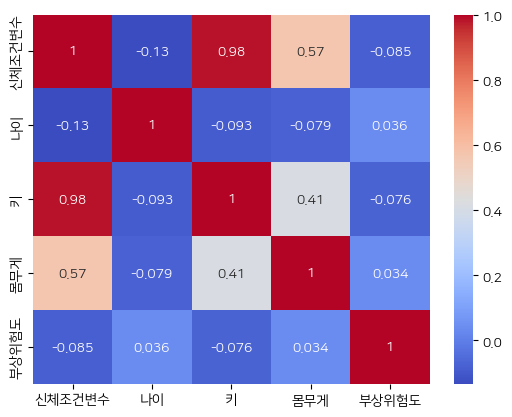

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(fatigue_df[['Ïã†Ï≤¥Ï°∞Í±¥Î≥ÄÏàò', 'ÎÇòÏù¥', 'ÌÇ§', 'Î™∏Î¨¥Í≤å', 'Î∂ÄÏÉÅÏúÑÌóòÎèÑ']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [27]:
# 1Ïó∞Ìà¨ : 1, 2Ïó∞Ìà¨ : 1+2, 3Ïó∞Ìà¨ : 1+2+3, 4Ïó∞Ìà¨ : 1+2+3+4
fatigue_df['ÎàÑÏ†ÅÏó∞Ìà¨ÏùºÏàò'] = fatigue_df['Ïó∞Ìà¨ÏùºÏàò'] * (fatigue_df['Ïó∞Ìà¨ÏùºÏàò'] + 1) // 2

Ïã†Ï≤¥Ï°∞Í±¥Î≥ÄÏàò    ÎàÑÏ†ÅÏó∞Ìà¨ÏùºÏàò       Ìà¨Íµ¨Ïàò      Ìú¥ÏãùÏùºÏàò
Ïã†Ï≤¥Ï°∞Í±¥Î≥ÄÏàò  1.000000 -0.034269  0.159193  0.032547
ÎàÑÏ†ÅÏó∞Ìà¨ÏùºÏàò -0.034269  1.000000 -0.216317 -0.245705
Ìà¨Íµ¨Ïàò     0.159193 -0.216317  1.000000  0.240756
Ìú¥ÏãùÏùºÏàò    0.032547 -0.245705  0.240756  1.000000

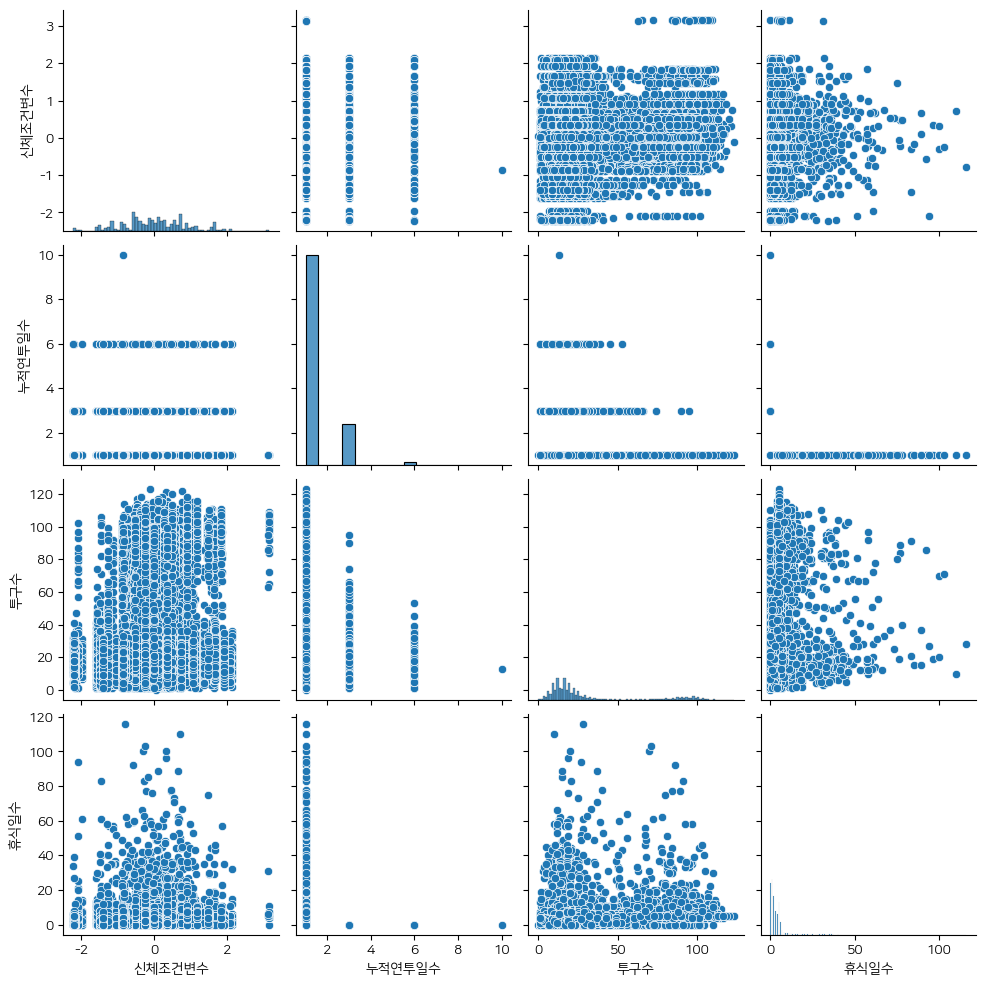

In [28]:
sns.pairplot(fatigue_df, vars=['Ïã†Ï≤¥Ï°∞Í±¥Î≥ÄÏàò', 'ÎàÑÏ†ÅÏó∞Ìà¨ÏùºÏàò', 'Ìà¨Íµ¨Ïàò', 'Ìú¥ÏãùÏùºÏàò'])
fatigue_df[['Ïã†Ï≤¥Ï°∞Í±¥Î≥ÄÏàò', 'ÎàÑÏ†ÅÏó∞Ìà¨ÏùºÏàò', 'Ìà¨Íµ¨Ïàò', 'Ìú¥ÏãùÏùºÏàò']].corr()

In [29]:
fatigue_df

ÏÑ†Ïàò    Ïó∞ÎèÑ   ÌåÄ  Î≥¥ÏßÅ  ÎÇòÏù¥    ÌÇ§  Î™∏Î¨¥Í≤å          ÎÇ†Ïßú  Íµ¨Ïû•    Ïò®ÎèÑ  ...    ÌôòÍ≤ΩÏßÄÏàò_z  \
0      Í≥†ÏòÅÌëú  2021  KT  SP  34  187   88  2021-04-07   1  16.7  ... -0.732095   
1      Í≥†ÏòÅÌëú  2021  KT  SP  34  187   88  2021-04-13   0  10.2  ... -1.747576   
2      Í≥†ÏòÅÌëú  2021  KT  SP  34  187   88  2021-04-18   1  13.2  ... -0.883977   
3      Í≥†ÏòÅÌëú  2021  KT  SP  34  187   88  2021-04-24   1  22.8  ... -0.186269   
4      Í≥†ÏòÅÌëú  2021  KT  SP  34  187   88  2021-04-30   1  12.0  ... -0.871273   
...    ...   ...  ..  ..  ..  ...  ...         ...  ..   ...  ...       ...   
17523  ÌõÑÎùºÎèÑ  2024  ÌÇ§ÏõÄ  SP  29  188  109  2024-08-25   1  25.5  ...  0.627052   
17524  ÌõÑÎùºÎèÑ  2024  ÌÇ§ÏõÄ  SP  29  188  109  2024-09-03   0  28.0  ...  0.165115   
17525  ÌõÑÎùºÎèÑ  2024  ÌÇ§ÏõÄ  SP  29  188  109  2024-09-08   0  32.0  ...  0.447546   
17526  ÌõÑÎùºÎèÑ  2024  ÌÇ§ÏõÄ  SP  29  188  109  2024-09-14   0  33.4  ...  0.613076   
17527  ÌõÑÎùºÎèÑ  2024  ÌÇ§ÏõÄ  SP  29  188  109  2024-09-22   0  25.7  ...  0.197442   

         Ïô∏Î∂ÄÌôòÍ≤ΩÎ≥ÄÏàò     ERA_z    WHIP_z  ÏßÅÍµ¨_ÌîºÏïàÌÉÄÏú®_z    ÏÑ†ÏàòÍ∏∞ÎüâÎ≥ÄÏàò    Ïã†Ï≤¥Ï°∞Í±¥ÏßÄÏàò  Ïã†Ï≤¥Ï°∞Í±¥_PC1  \
0     -1.212969 -0.305372 -0.433944  -0.347834 -0.380410  0.223718  0.223718   
1     -1.959917 -0.069172 -0.258839  -0.347834 -0.204072  0.223718  0.223718   
2     -1.413517 -0.187272 -0.433944  -0.347834 -0.340099  0.223718  0.223718   
3     -0.508470 -0.069172  0.081070  -0.347834 -0.018271  0.223718  0.223718   
4     -1.400480 -0.119561 -0.274290  -0.347834 -0.229717  0.223718  0.223718   
...         ...       ...       ...        ...       ...       ...       ...   
17523  0.525287 -0.221127 -0.639949   0.222443 -0.400362  2.412543  2.412543   
17524  0.499845  0.032394  0.132571   0.222443  0.108448  2.412543  2.412543   
17525  0.866492 -0.133733 -0.372142   0.222443 -0.224143  2.412543  2.412543   
17526  1.079015 -0.321906 -0.346391   0.222443 -0.274296  2.412543  2.412543   
17527  0.534905  0.285128 -0.346391   0.222443 -0.067098  2.412543  2.412543   

       Ïã†Ï≤¥Ï°∞Í±¥_PC2    Ïã†Ï≤¥Ï°∞Í±¥Î≥ÄÏàò  
0     -0.495669  0.519873  
1     -0.495669  0.519873  
2     -0.495669  0.519873  
3     -0.495669  0.519873  
4     -0.495669  0.519873  
...         ...       ...  
17523 -0.205189  1.173824  
17524 -0.205189  1.173824  
17525 -0.205189  1.173824  
17526 -0.205189  1.173824  
17527 -0.205189  1.173824  

[17528 rows x 90 columns]

In [35]:
fatigue_df['ÌîºÎ°úÎèÑÏßÄÌëú'] = fatigue_df['ÌîºÎ°úÎèÑÏßÄÏàò'] * 100

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# --- Ìà¨Ïàò A/B ÏûÖÎ†• ---
Ìà¨Ïàò_A = {'ÏÑ†Ïàò': 'ÍπÄÏòÅÍ∑ú', 'Ïó∞ÎèÑ': 2024, 'ÎÇ†Ïßú': '2024-07-21', 'ÌåÄ': 'NC'}
Ìà¨Ïàò_B = {'ÏÑ†Ïàò': 'ÍπÄÏû¨Ïó¥', 'Ïó∞ÎèÑ': 2024, 'ÎÇ†Ïßú': '2024-07-18', 'ÌåÄ': 'NC'}

# --- A/B Ìñâ Ï∂îÏ∂ú Ìï®Ïàò ---
def get_pitcher_row(df, info):
    row = df[
        (df['ÏÑ†Ïàò'] == info['ÏÑ†Ïàò']) &
        (df['Ïó∞ÎèÑ'] == info['Ïó∞ÎèÑ']) &
        (df['ÎÇ†Ïßú'] == info['ÎÇ†Ïßú']) &
        (df['ÌåÄ'] == info['ÌåÄ'])
    ]
    if row.empty:
        raise ValueError(f"‚ùå Ï°∞Í±¥Ïóê ÎßûÎäî Îì±ÌåêÏù¥ ÏóÜÏäµÎãàÎã§: {info}")
    return row.iloc[0]

row_A = get_pitcher_row(fatigue_df, Ìà¨Ïàò_A)
row_B = get_pitcher_row(fatigue_df, Ìà¨Ïàò_B)

# --- ÌöåÍ∑Ä ÌïôÏäµ (ÌîºÎ°úÎèÑÏßÄÌëú Ìè¨Ìï®) ---
X_raw = fatigue_df[['ÏÑ†ÏàòÍ∏∞ÎüâÎ≥ÄÏàò', 'Ïã†Ï≤¥Ï°∞Í±¥Î≥ÄÏàò', 'Ïô∏Î∂ÄÌôòÍ≤ΩÎ≥ÄÏàò', 'ÌîºÎ°úÎèÑÏßÄÌëú']]
y = fatigue_df['GS']

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X_raw)

model = LinearRegression()
model.fit(X_scaled, y)

b0, b1, b2, b3, b4 = model.intercept_, *model.coef_

# --- A/B ÏûÖÎ†•Í∞í Ïä§ÏºÄÏùºÎßÅ ---
a_scaled = standard_scaler.transform([[row_A['ÏÑ†ÏàòÍ∏∞ÎüâÎ≥ÄÏàò'], row_A['Ïã†Ï≤¥Ï°∞Í±¥Î≥ÄÏàò'], row_A['Ïô∏Î∂ÄÌôòÍ≤ΩÎ≥ÄÏàò'], 0]])[0]
b_scaled = standard_scaler.transform([[row_B['ÏÑ†ÏàòÍ∏∞ÎüâÎ≥ÄÏàò'], row_B['Ïã†Ï≤¥Ï°∞Í±¥Î≥ÄÏàò'], row_B['Ïô∏Î∂ÄÌôòÍ≤ΩÎ≥ÄÏàò'], row_B['ÌîºÎ°úÎèÑÏßÄÌëú']]])[0]

# --- Ïó≠Ï†ÑÏ†ê Í≥ÑÏÇ∞ (standard Ïä§ÏºÄÏùº) ---
numerator = b1 * (a_scaled[0] - b_scaled[0]) + b2 * (a_scaled[1] - b_scaled[1]) + b3 * (a_scaled[2] - b_scaled[2])
denominator = b4
Ïó≠Ï†ÑÏ†ê_standard = b_scaled[3] - (numerator / denominator)

# --- Ïä§ÏºÄÏùº Ïó≠Î≥ÄÌôò (standard ‚Üí ÏßÄÌëú) ---
# ÌîºÎ°úÎèÑÏßÄÌëúÎäî Ïù¥ÎØ∏ MinMaxScaling Îêú Í∞íÏù¥ÎØÄÎ°ú Ïó≠Ï†ÑÏ†ê_standard ‚Üí ÏõêÎûò ÌîºÎ°úÎèÑÏßÄÌëú Îã®ÏúÑÎ°ú ÎêòÎèåÎ¶¨Í∏∞
# ÌëúÏ§ÄÌôî Ï†ÑÏùò ÌîºÎ°úÎèÑÏßÄÌëú ÌèâÍ∑†/ÌëúÏ§ÄÌé∏Ï∞®Î°ú Î≥µÏõê
ÏßÄÌëú_ÌèâÍ∑† = fatigue_df['ÌîºÎ°úÎèÑÏßÄÌëú'].mean()
ÏßÄÌëú_ÌëúÏ§ÄÌé∏Ï∞® = fatigue_df['ÌîºÎ°úÎèÑÏßÄÌëú'].std()
Ïó≠Ï†ÑÏ†ê_ÌîºÎ°úÎèÑÏßÄÌëú = Ïó≠Ï†ÑÏ†ê_standard * ÏßÄÌëú_ÌëúÏ§ÄÌé∏Ï∞® + ÏßÄÌëú_ÌèâÍ∑†

# ‚úÖ ÏµúÏ¢Ö Ï∂úÎ†•
if Ïó≠Ï†ÑÏ†ê_ÌîºÎ°úÎèÑÏßÄÌëú < 0:
    print(f"‚ùó {Ìà¨Ïàò_A['ÏÑ†Ïàò']}ÏùÄ(Îäî) ÏïÑÎ¨¥Î¶¨ ÌîºÎ°úÌï¥Ï†∏ÎèÑ {Ìà¨Ïàò_B['ÏÑ†Ïàò']}Î≥¥Îã§ ÏÑ±Îä•Ïù¥ ÎÇÆÏïÑÏßÄÏßÄ ÏïäÏäµÎãàÎã§.")
else:
    print(f"‚úÖ Ïó≠Ï†ÑÏ†ê (ÌîºÎ°úÎèÑÏßÄÌëú Í∏∞Ï§Ä): {Ìà¨Ïàò_A['ÏÑ†Ïàò']}Ïù¥(Í∞Ä) ÌîºÎ°úÎèÑÏßÄÌëú {Ïó≠Ï†ÑÏ†ê_ÌîºÎ°úÎèÑÏßÄÌëú:.1f} Ïù¥ÏÉÅÏùº Îïå {Ìà¨Ïàò_B['ÏÑ†Ïàò']}Î≥¥Îã§ ÏÑ±Îä•Ïù¥ ÎÇÆÏïÑÏßëÎãàÎã§.")


‚úÖ Ïó≠Ï†ÑÏ†ê (ÌîºÎ°úÎèÑÏßÄÌëú Í∏∞Ï§Ä): ÍπÄÏòÅÍ∑úÏù¥(Í∞Ä) ÌîºÎ°úÎèÑÏßÄÌëú 41.2 Ïù¥ÏÉÅÏùº Îïå ÍπÄÏû¨Ïó¥Î≥¥Îã§ ÏÑ±Îä•Ïù¥ ÎÇÆÏïÑÏßëÎãàÎã§.


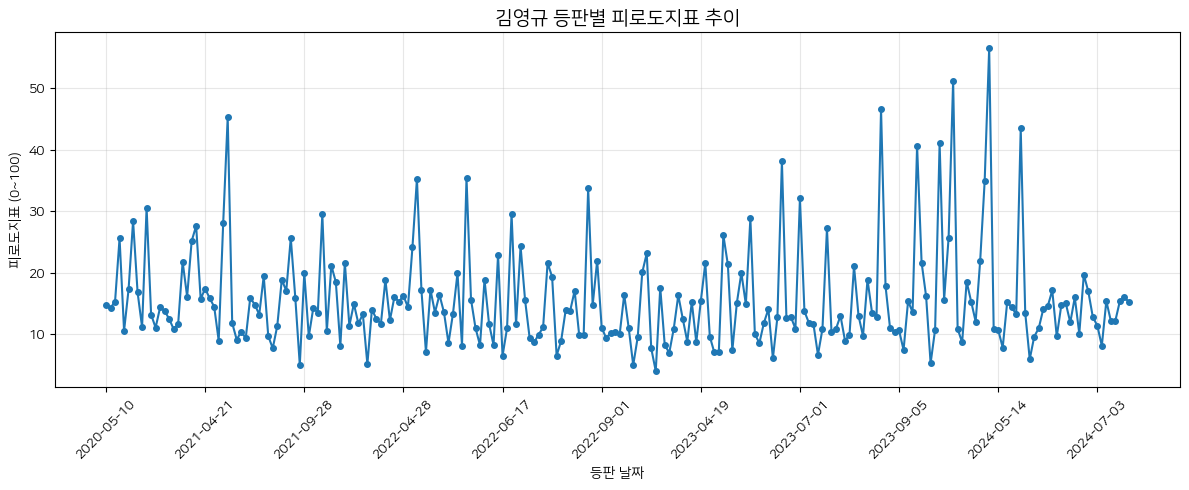

In [53]:
import matplotlib.pyplot as plt

# Ï†ïÎ†¨
df_ÍπÄÏòÅÍ∑ú = fatigue_df[fatigue_df['ÏÑ†Ïàò'] == 'ÍπÄÏòÅÍ∑ú'].copy()
df_ÍπÄÏòÅÍ∑ú = df_ÍπÄÏòÅÍ∑ú.sort_values(by='ÎÇ†Ïßú').reset_index(drop=True)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 5))
plt.plot(df_ÍπÄÏòÅÍ∑ú['ÎÇ†Ïßú'], df_ÍπÄÏòÅÍ∑ú['ÌîºÎ°úÎèÑÏßÄÌëú'], marker='o', markersize=4, linewidth=1.5)

# xÏ∂ï ÎÇ†Ïßú ÎùºÎ≤® Í∞ÑÍ≤© Ï§ÑÏù¥Í∏∞
step = max(len(df_ÍπÄÏòÅÍ∑ú) // 10, 1)  # 10Í∞ú Ï†ïÎèÑÎßå ÌëúÏãú
plt.xticks(df_ÍπÄÏòÅÍ∑ú['ÎÇ†Ïßú'][::step], rotation=45)

plt.title('ÍπÄÏòÅÍ∑ú Îì±ÌåêÎ≥Ñ ÌîºÎ°úÎèÑÏßÄÌëú Ï∂îÏù¥', fontsize=14)
plt.xlabel('Îì±Ìåê ÎÇ†Ïßú')
plt.ylabel('ÌîºÎ°úÎèÑÏßÄÌëú (0~100)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

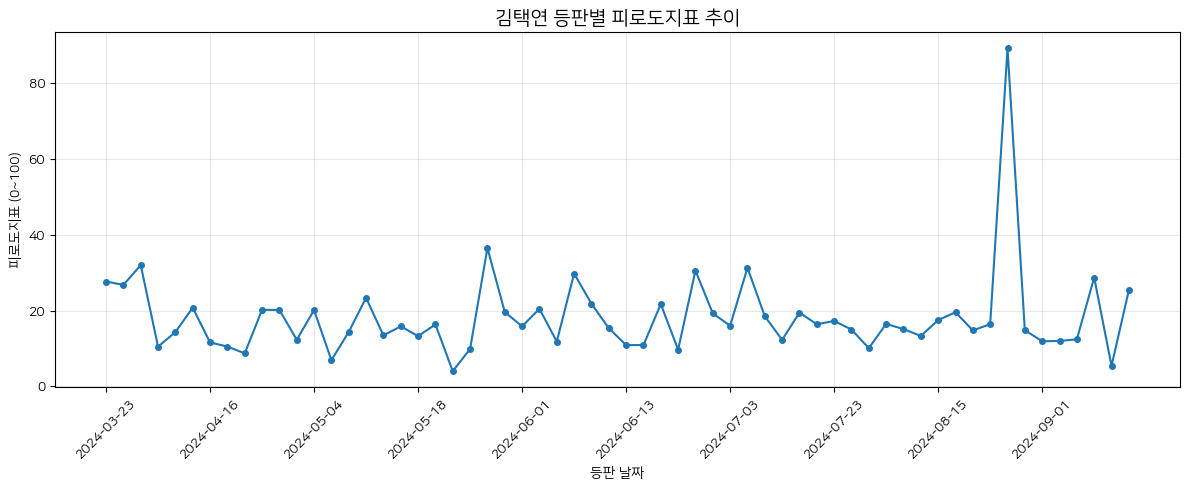

In [54]:
import matplotlib.pyplot as plt

# ÍπÄÌÉùÏó∞ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú Î∞è Ï†ïÎ†¨
df_ÍπÄÌÉùÏó∞ = fatigue_df[fatigue_df['ÏÑ†Ïàò'] == 'ÍπÄÌÉùÏó∞'].copy()
df_ÍπÄÌÉùÏó∞ = df_ÍπÄÌÉùÏó∞.sort_values(by='ÎÇ†Ïßú').reset_index(drop=True)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 5))
plt.plot(df_ÍπÄÌÉùÏó∞['ÎÇ†Ïßú'], df_ÍπÄÌÉùÏó∞['ÌîºÎ°úÎèÑÏßÄÌëú'], marker='o', markersize=4, linewidth=1.5)

# xÏ∂ï ÎÇ†Ïßú ÎùºÎ≤® Í∞ÑÍ≤© Ï§ÑÏù¥Í∏∞
step = max(len(df_ÍπÄÌÉùÏó∞) // 10, 1)  # 10Í∞ú Ï†ïÎèÑÎßå ÌëúÏãú
plt.xticks(df_ÍπÄÌÉùÏó∞['ÎÇ†Ïßú'][::step], rotation=45)

plt.title('ÍπÄÌÉùÏó∞ Îì±ÌåêÎ≥Ñ ÌîºÎ°úÎèÑÏßÄÌëú Ï∂îÏù¥', fontsize=14)
plt.xlabel('Îì±Ìåê ÎÇ†Ïßú')
plt.ylabel('ÌîºÎ°úÎèÑÏßÄÌëú (0~100)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


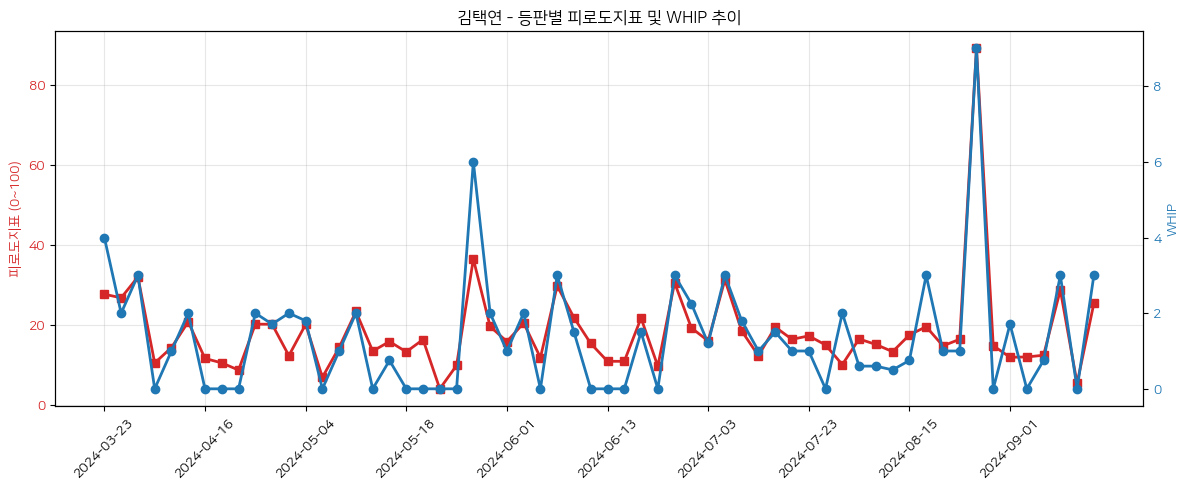

In [58]:
import matplotlib.pyplot as plt

# ÍπÄÌÉùÏó∞ Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨
df_ÍπÄÌÉùÏó∞ = fatigue_df[fatigue_df['ÏÑ†Ïàò'] == 'ÍπÄÌÉùÏó∞'].copy()
df_ÍπÄÌÉùÏó∞ = df_ÍπÄÌÉùÏó∞.sort_values(by='ÎÇ†Ïßú').reset_index(drop=True)

# ÎÇ†Ïßú
x = df_ÍπÄÌÉùÏó∞['ÎÇ†Ïßú']

# --- Í∑∏ÎûòÌîÑ ÏãúÏûë ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# YÏ∂ï 1: ÌîºÎ°úÎèÑÏßÄÌëú (0~100)
ax1.plot(x, df_ÍπÄÌÉùÏó∞['ÌîºÎ°úÎèÑÏßÄÌëú'], color='tab:red', marker='s', label='ÌîºÎ°úÎèÑÏßÄÌëú', linewidth=2)
ax1.set_ylabel('ÌîºÎ°úÎèÑÏßÄÌëú (0~100)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# YÏ∂ï 2: WHIP
ax2 = ax1.twinx()
ax2.plot(x, df_ÍπÄÌÉùÏó∞['WHIP'], color='tab:blue', marker='o', label='WHIP', linewidth=2)
ax2.set_ylabel('WHIP', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# XÏ∂ï ÏÑ§Ï†ï
step = max(len(x) // 10, 1)
ax1.set_xticks(x[::step])
ax1.set_xticklabels(x[::step], rotation=45)

# Ï†úÎ™© Î∞è Ïä§ÌÉÄÏùº
plt.title('ÍπÄÌÉùÏó∞ - Îì±ÌåêÎ≥Ñ ÌîºÎ°úÎèÑÏßÄÌëú Î∞è WHIP Ï∂îÏù¥')
ax1.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


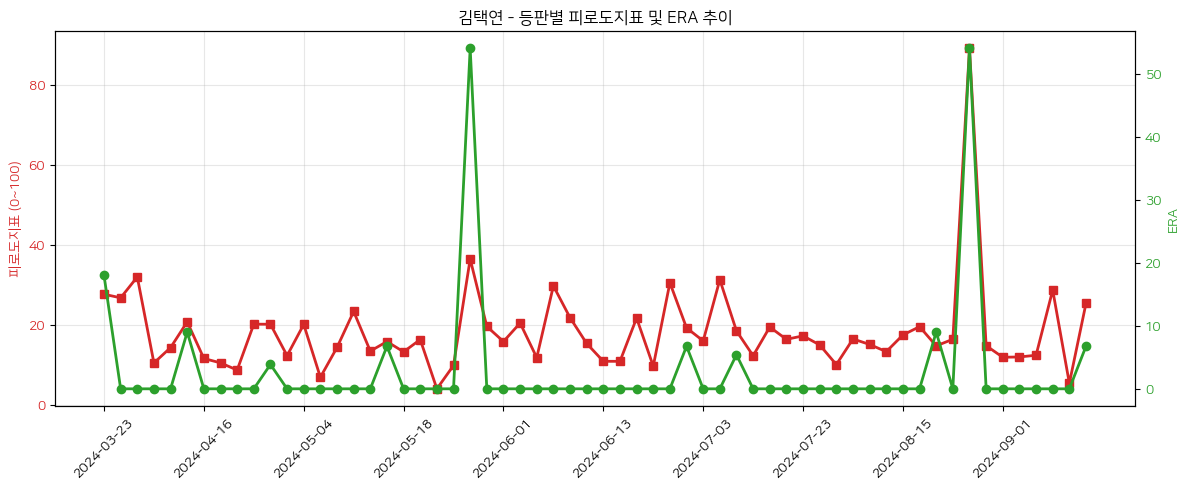

In [59]:
# ERA & ÌîºÎ°úÎèÑÏßÄÌëú
fig, ax1 = plt.subplots(figsize=(12, 5))

# Y1: ÌîºÎ°úÎèÑÏßÄÌëú
ax1.plot(x, df_ÍπÄÌÉùÏó∞['ÌîºÎ°úÎèÑÏßÄÌëú'], color='tab:red', marker='s', label='ÌîºÎ°úÎèÑÏßÄÌëú', linewidth=2)
ax1.set_ylabel('ÌîºÎ°úÎèÑÏßÄÌëú (0~100)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Y2: ERA
ax2 = ax1.twinx()
ax2.plot(x, df_ÍπÄÌÉùÏó∞['ERA'], color='tab:green', marker='o', label='ERA', linewidth=2)
ax2.set_ylabel('ERA', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# XÏ∂ï ÏÑ§Ï†ï
ax1.set_xticks(x[::step])
ax1.set_xticklabels(x[::step], rotation=45)

plt.title('ÍπÄÌÉùÏó∞ - Îì±ÌåêÎ≥Ñ ÌîºÎ°úÎèÑÏßÄÌëú Î∞è ERA Ï∂îÏù¥')
ax1.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


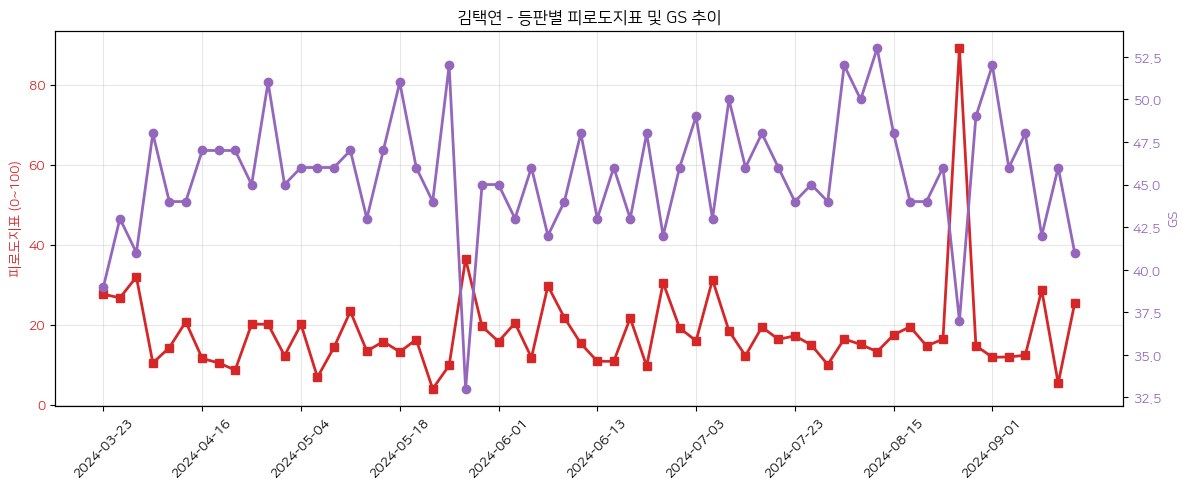

In [60]:
# GS & ÌîºÎ°úÎèÑÏßÄÌëú
fig, ax1 = plt.subplots(figsize=(12, 5))

# Y1: ÌîºÎ°úÎèÑÏßÄÌëú
ax1.plot(x, df_ÍπÄÌÉùÏó∞['ÌîºÎ°úÎèÑÏßÄÌëú'], color='tab:red', marker='s', label='ÌîºÎ°úÎèÑÏßÄÌëú', linewidth=2)
ax1.set_ylabel('ÌîºÎ°úÎèÑÏßÄÌëú (0~100)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Y2: GS
ax2 = ax1.twinx()
ax2.plot(x, df_ÍπÄÌÉùÏó∞['GS'], color='tab:purple', marker='o', label='GS', linewidth=2)
ax2.set_ylabel('GS', color='tab:purple')
ax2.tick_params(axis='y', labelcolor='tab:purple')

# XÏ∂ï ÏÑ§Ï†ï
ax1.set_xticks(x[::step])
ax1.set_xticklabels(x[::step], rotation=45)

plt.title('ÍπÄÌÉùÏó∞ - Îì±ÌåêÎ≥Ñ ÌîºÎ°úÎèÑÏßÄÌëú Î∞è GS Ï∂îÏù¥')
ax1.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

In [56]:
# ÍπÄÌÉùÏó∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_ÍπÄÌÉùÏó∞ = fatigue_df[fatigue_df['ÏÑ†Ïàò'] == 'ÍπÄÌÉùÏó∞'].copy()

# ÌîºÎ°úÎèÑÏßÄÌëú ÏµúÎåÄÍ∞í Ìñâ Ï∂îÏ∂ú
row_max = df_ÍπÄÌÉùÏó∞.loc[df_ÍπÄÌÉùÏó∞['ÌîºÎ°úÎèÑÏßÄÌëú'].idxmax()]

# Í≤∞Í≥º Ï∂úÎ†•
print(f"üìå ÍπÄÌÉùÏó∞ ÌîºÎ°úÎèÑÏßÄÌëú ÏµúÍ≥†Ïπò Îì±ÌåêÏùº:")
print(f"- ÎÇ†Ïßú: {row_max['ÎÇ†Ïßú']}")
print(f"- ÌîºÎ°úÎèÑÏßÄÌëú: {row_max['ÌîºÎ°úÎèÑÏßÄÌëú']:.1f}")
print(f"- ERA: {row_max['ERA']:.2f}, WHIP: {row_max['WHIP']:.2f}")


üìå ÍπÄÌÉùÏó∞ ÌîºÎ°úÎèÑÏßÄÌëú ÏµúÍ≥†Ïπò Îì±ÌåêÏùº:
- ÎÇ†Ïßú: 2024-08-24
- ÌîºÎ°úÎèÑÏßÄÌëú: 89.1
- ERA: 54.00, WHIP: 9.00


In [45]:
print(f"b1 (Í∏∞Îüâ): {b1}")
print(f"b2 (Ïã†Ï≤¥): {b2}")
print(f"b3 (ÌôòÍ≤Ω): {b3}")
print(f"b4 (ÌîºÎ°úÎèÑ): {b4}")

b1 (Í∏∞Îüâ): 1.54587207930947
b2 (Ïã†Ï≤¥): 0.0031874066066522877
b3 (ÌôòÍ≤Ω): -0.005556853445982466
b4 (ÌîºÎ°úÎèÑ): 0.39501185063535693


In [38]:
fatigue_df['ÌîºÎ°úÎèÑÏßÄÏàò']

0        0.130131
1        0.140647
2        0.131611
3        0.124705
4        0.119807
           ...   
17523    0.124512
17524    0.194011
17525    0.111868
17526    0.110953
17527    0.126659
Name: ÌîºÎ°úÎèÑÏßÄÏàò, Length: 17528, dtype: float64